# Homework 2 Problem 9 CDMA Example
## Joshua Agarth
2/15/17

In [1]:
# Import the necessary python libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create function for determining the CDMA transmission

In [2]:
def CDMA(chip, data):
    temp = []                               # Create an empty array where we will place our TX values
    for i in range(len(data)):              # For all the values in the ASCII data set
        if data[i] == 0:                    # If a 0 is being transmitted place the 1*chip value into the array
            temp = np.append(temp, chip)    # Append to temp array
        else:                               # Else if a 1 is being transmitted place a -1*chip cluea in the array
            temp = np.append(temp, -1*chip) # Append to temp array
    return temp                             # Return the conditioned Transmit data

In [3]:
byte_length = 8

#Intitialize ASCII data
A = np.array([0,1,0,0,0,0,0,1])   
B = np.array([0,1,0,0,0,0,1,0])
C = np.array([0,1,0,0,0,0,1,1])

# Initialize the chip codes
cA = np.array([-1,1,-1,1])
cB = np.array([-1,-1,1,1])
cC = np.array([-1,1,1,-1])

# Get the encoded transmission data
outA = CDMA(cA,A)
outB = CDMA(cB,B)
outC = CDMA(cC,C)

# Part A 


## Plot User A Transmission

In [4]:
# Set the minimum and maximum values for y axis
ymin = -2
ymax = 2

# Create a linspace array to represent time in nanoseconds
x = np.linspace(0,len(outA)*100,len(outA))

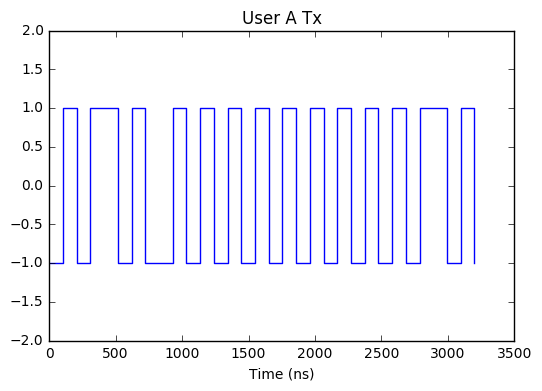

In [5]:
a = plt.plot(x, outA, color='blue', drawstyle='steps-post')     # Plot the Transmission
a = plt.ylim(ymin, ymax)                                        # Set the y axis limits
a = plt.title('User A Tx')                                      # Create a title for the plot
a = plt.xlabel("Time (ns)")                                     # Create and x axis label

## Plot User B Transmission

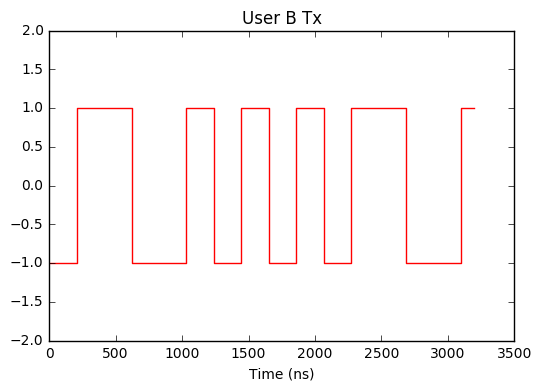

In [6]:
b = plt.plot(x, outB, color='red', drawstyle='steps-post')      # Plot the Transmission
b = plt.ylim(ymin, ymax)                                        # Set the y axis limits
b = plt.title('User B Tx')                                      # Create a title for the plot
b = plt.xlabel("Time (ns)")                                     # Create and x axis label

## Plot User C Transmission Data

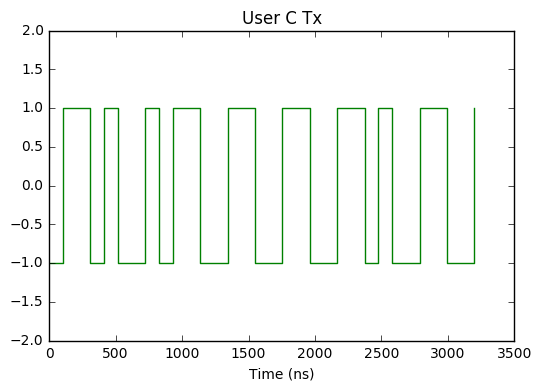

In [7]:
c = plt.plot(x, outC, color='green', drawstyle='steps-post')    # Plot the Transmission
c = plt.ylim(ymin, ymax)                                        # Set the y axis limits
c = plt.title('User C Tx')                                      # Create a title for the plot
c = plt.xlabel("Time (ns)")                                     # Create and x axis label

# Part B

## Plot the composite signal in an ideal channel model

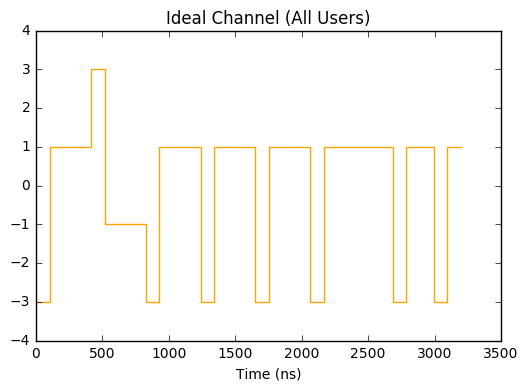

In [8]:
# Elementwise Add the transmissions of UserA, UserB, and UserC
AB  = np.add(outA,outB)
ABC = np.add(AB,outC)

abc = plt.plot(x, ABC, color='orange', drawstyle='steps-post')
abc = plt.ylim(ymin*2, ymax*2)
abc = plt.title('Ideal Channel (All Users)')
abc = plt.xlabel("Time (ns)")

# Part C

## Correlation at the Reciever

In [9]:
def decode(Rx_data, chip):               # Cross correlater function
    Rx = []                              # Initialize output array
    cnt = int(len(Rx_data)/4)            # Get the length of the incoming data
    for i in range(cnt):                 # Loop through the data sequence
        symbols = (Rx_data[4*i:4*(i+1)]) # Isolate the symbols in the transmission
        decode = np.dot(symbols,chip)    # Dot product of the channel data with the chip code
        Rx = np.append(Rx,decode)        # Append to an array and send to output
   
    return Rx

### Take the reciever data and decode it using cross correlation 
 
 Print out the results

In [10]:
Rx_A = decode(ABC,cA)
Rx_B = decode(ABC,cB)
Rx_C = decode(ABC,cC)

print(Rx_A)
print(Rx_B)
print(Rx_C)

[ 4. -4.  4.  4.  4.  4.  4. -4.]
[ 4. -4.  4.  4.  4.  4. -4.  4.]
[ 4. -4.  4.  4.  4.  4. -4. -4.]


This result show that the cross correlation worked for the transmitted data. Where a 0 was transmitted a large positive value should appear at the receiver. Furthermore, where a 1 was transmitted a large negative value should appear at the cross-correlated output of the receiver. Next, some more logic can be implemented to decided whether the transmitted bit is a '1' or a '0'.

### Now make a decision on what the cross correlated data means in terms of ones and zeros.

In [11]:
def decision(seq):
    Rx_bit = []                              # Initialize the bit sequence array
    for i in range (len(seq)):               # Cycle through the data
        if seq[i] > 2:                       # If the sequence is a large number
            Rx_bit = np.append(Rx_bit, [0])  # Output a zero
        elif seq[i] < -2:                    #If the sequence is a large negative number
            Rx_bit = np.append(Rx_bit, [1])  # Output a one
            
    return Rx_bit

### Do the decision function for each cross-correlated output and print out the results

In [12]:

Rx_Ad = decision(Rx_A)
Rx_Bd = decision(Rx_B)
Rx_Cd = decision(Rx_C)

print(Rx_Ad)
print(Rx_Bd)
print(Rx_Cd)


[ 0.  1.  0.  0.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0.  1.  0.]
[ 0.  1.  0.  0.  0.  0.  1.  1.]


The decision rule output in the results shown above matched our input sequence perfectly for each user. To review each user sent out an ASCII character based on their user letter. (eg. A for userA, B for userB, etc.) These match the ASCII data output by our receiever. In the presence of a white gaussian noise an maximum likelihood or maximum a poteriori estimation might be used to determine the output of each bit. However, the decison rule is beyond the scope of this assignment. 